In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv
/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv
/kaggle/input/smoker-status-prediction-using-biosignals/test_dataset.csv


![](https://kartinkof.club/uploads/posts/2022-03/1648251115_8-kartinkof-club-p-muzhik-kurit-mem-8.jpg)

<div style="background-color: gold;
            color: white;
            text-align: center;
            border-radius: 10px;
            padding: 10px;
            font-size: 20px">
    
Hope You liked my notebook! If it was useful to You then please don't forget to upvote it. Thank You!
    
</div>

# <span style="color: red">Updata (06.11.2023) Concatenated original train data with competition train data</span>

# <span style="color: orange">Table of Contents</span>

1. [Import libraries](#1)
2. [Open data files](#2)
3. [Show first 5 lines of train data](#3)
    - 3.1 [Compare original train and competition train](#3.1)
    - 3.2 [Concatenate original train with competition train](#3.2)
4. [Shapes of train and test data](#4)
5. [Display descriptive statistics of train data](#5)
6. [Check the number of gaps for each feature](#6)
7. [Data types of training set](#7)
8. [Display histograms of distribution](#8)
9. [Let's count target of train data](#9)
10. [Transorm the data with logarithm](#10)
    - 10.1 [Feature importance](#10.1)
11. [Build a heat map of correlations](#11)
12. [Define base models with tuned hyperparameters](#12)
13. [Defining the meta-model with tuned hyperparameters](#13)
14. [Creating and fitting the stacking model](#14)
15. [Predict probabilitions on the validation set and calculate ROC AUC score](#15)
16. [Predict probabilities on the test data](#16)
17. [Build DataFrame and make first submission](#17)# <span style="color: orange">Table of Contents</span>

<span style="font-family: Verdana; color: Orange; font-weight: bold;">id</span>: Unique identifier for each data point.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">age</span>: Age of the individual, categorized in 5-year intervals.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">height(cm)</span>: Height of the individual in centimeters.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">weight(kg)</span>: Weight of the individual in kilograms.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">waist(cm)</span>: Waist circumference of the individual in centimeters.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">eyesight(left/right)</span>: Eyesight measurements for the left and right eyes.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">hearing(left/right)</span>: Hearing ability for the left and right ears, represented as binary.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">systolic</span>: Systolic blood pressure measurement.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">relaxation</span>: Diastolic blood pressure measurement.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">fasting blood sugar</span>: Fasting blood sugar level.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">Cholesterol</span>: Total cholesterol level.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">triglyceride</span>: Triglyceride level.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">HDL</span>: High-density lipoprotein cholesterol level.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">LDL</span>: Low-density lipoprotein cholesterol level.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">hemoglobin</span>: Hemoglobin level in the blood.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">Urine protein</span>: Level of protein in urine, categorized.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">serum creatinine</span>: Serum creatinine level.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">AST</span>: Level of aspartate aminotransferase enzyme.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">ALT</span>: Level of alanine aminotransferase enzyme.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">Gtp</span>: Level of gamma-glutamyl transferase enzyme.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">dental caries</span>: Presence (1) or absence (0) of dental cavities.

<span style="font-family: Verdana; color: Orange; font-weight: bold;">smoking</span>: Target variable indicating if the individual is a smoker (1) or not (0).

<font face="Bahnschrift Condensed" style="font-size: 14pt;">
    Smoking has been proven to negatively affect health in a multitude of ways. Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world’s overall health.
</font>
<br>
<br>
<font face="Bahnschrift Condensed" style="font-size: 14pt;">
    According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.
</font>
<br>
<br>
<font face="Bahnschrift Condensed" style="font-size: 14pt;">
    Evidence-based treatment for assistance in smoking cessation had been proposed and promoted. However, only less than one third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming, and did not routinely do so in daily practice. To overcome this problem, several factors had been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for the physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each individual smoker. Health outcome prediction models had been developed using methods of machine learning over recent years.
</font>
<br>
<br>
<font face="Bahnschrift Condensed" style="font-size: 14pt;">
    A group of scientists are working on predictive models with smoking status as the prediction target. Your task is to help them create a machine learning model to identify the smoking status of an individual using bio-signals.
</font>

<a id='1'></a>
### <span style="color: gold">1 - Import libraries</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

<a id='2'></a>
### <span style="color: orange">2 - Open data files</span>

In [3]:
original_train = pd.read_csv('/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv')
original_test = pd.read_csv('/kaggle/input/smoker-status-prediction-using-biosignals/test_dataset.csv')

train = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')

<a id='3'></a>
### <span style="color: gold">3 - Show first 5 lines of train data</span>

In [4]:
# Show all properties on display
pd.set_option('display.max_columns', None)

train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


<a id='3.1'></a>
#### 3.1 Compare original train and competition train

In [5]:
print(original_train.shape)
original_train.columns.tolist()

(38984, 23)


['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

In [6]:
print(train.shape)
train.columns.tolist()

(159256, 24)


['id',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

We have to drop 'id' from competition dataset because there is no 'id' in original dataset

In [7]:
train.drop(columns='id', axis=1, inplace=True)
test.drop(columns='id', axis=1, inplace=True)

<a id='3.2'></a>
#### 3.2 Concatenate original train with competition train

In [8]:
print(f'Train data: {train.shape}')

Train data: (159256, 23)


In [9]:
train = pd.concat(objs=[train, original_train])
train.shape

(198240, 23)

##### Now You can see that train data became +38.9K objectives bigger than previous data

<a id='4'></a>
### <span style="color: orange">4 - Shapes of train and test data</span>

In [10]:
print(f'Train data: {train.shape}')
print(f'Test data: {test.shape}\n')

train_data_percentage = np.round(train.shape[0] / (train.shape[0] + test.shape[0]), 4)
print(f'Train data consists of {train_data_percentage * 100}% of all observations')
print(f'Test data consists of {(1 - train_data_percentage) * 100}% of all observations')

Train data: (198240, 23)
Test data: (106171, 22)

Train data consists of 65.12% of all observations
Test data consists of 34.88% of all observations


<a id='5'></a>
### <span style="color: gold">5 - Display descriptive statistics of train data</span>

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,198240.0,44.271418,11.886308,20.0,40.0,40.0,55.0,85.0
height(cm),198240.0,165.153375,8.895587,130.0,160.0,165.0,170.0,190.0
weight(kg),198240.0,66.906709,12.656868,30.0,55.0,65.0,75.0,135.0
waist(cm),198240.0,82.817163,9.039363,51.0,77.0,83.0,89.0,129.0
eyesight(left),198240.0,1.007599,0.422827,0.1,0.8,1.0,1.2,9.9
eyesight(right),198240.0,1.002519,0.414241,0.1,0.8,1.0,1.2,9.9
hearing(left),198240.0,1.024248,0.153820,1.0,1.0,1.0,1.0,2.0
hearing(right),198240.0,1.023966,0.152943,1.0,1.0,1.0,1.0,2.0
systolic,198240.0,122.301488,12.920634,71.0,113.0,121.0,130.0,233.0
relaxation,198240.0,76.701085,9.135720,40.0,70.0,77.0,82.0,146.0


#### As in the previous competition (S3E23), many features here contain several values ​​that are much greater than the 3rd quantile

<a id='6'></a>
### <span style="color: orange">6 - Check the number of gaps for each feature</span>

In [12]:
print('TRAIN data\n')
print(f'{train.isna().sum()}\n\n\n')

print('TEST data\n')
print(train.isna().sum())

TRAIN data

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64



TEST data

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin 

#### As we can see, there are no preliminary gaps in the data. However, sometimes it is useful to check the unique values ​​for each characteristic. After all, the gaps could be filled with a '?' and then the .isna() method will not notice them

<a id='7'></a>
### <span style="color: gold">7 - Data types of training set</span>

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198240 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  198240 non-null  int64  
 1   height(cm)           198240 non-null  int64  
 2   weight(kg)           198240 non-null  int64  
 3   waist(cm)            198240 non-null  float64
 4   eyesight(left)       198240 non-null  float64
 5   eyesight(right)      198240 non-null  float64
 6   hearing(left)        198240 non-null  int64  
 7   hearing(right)       198240 non-null  int64  
 8   systolic             198240 non-null  int64  
 9   relaxation           198240 non-null  int64  
 10  fasting blood sugar  198240 non-null  int64  
 11  Cholesterol          198240 non-null  int64  
 12  triglyceride         198240 non-null  int64  
 13  HDL                  198240 non-null  int64  
 14  LDL                  198240 non-null  int64  
 15  hemoglobin           19

#### As You can see, all data types are numeric, so if there are gaps, they were most likely filled with some kind of numeric values ​​like 0, median or average value

<a id='8'></a>
### <span style="color: orange">8 - Display histograms of distribution</span>

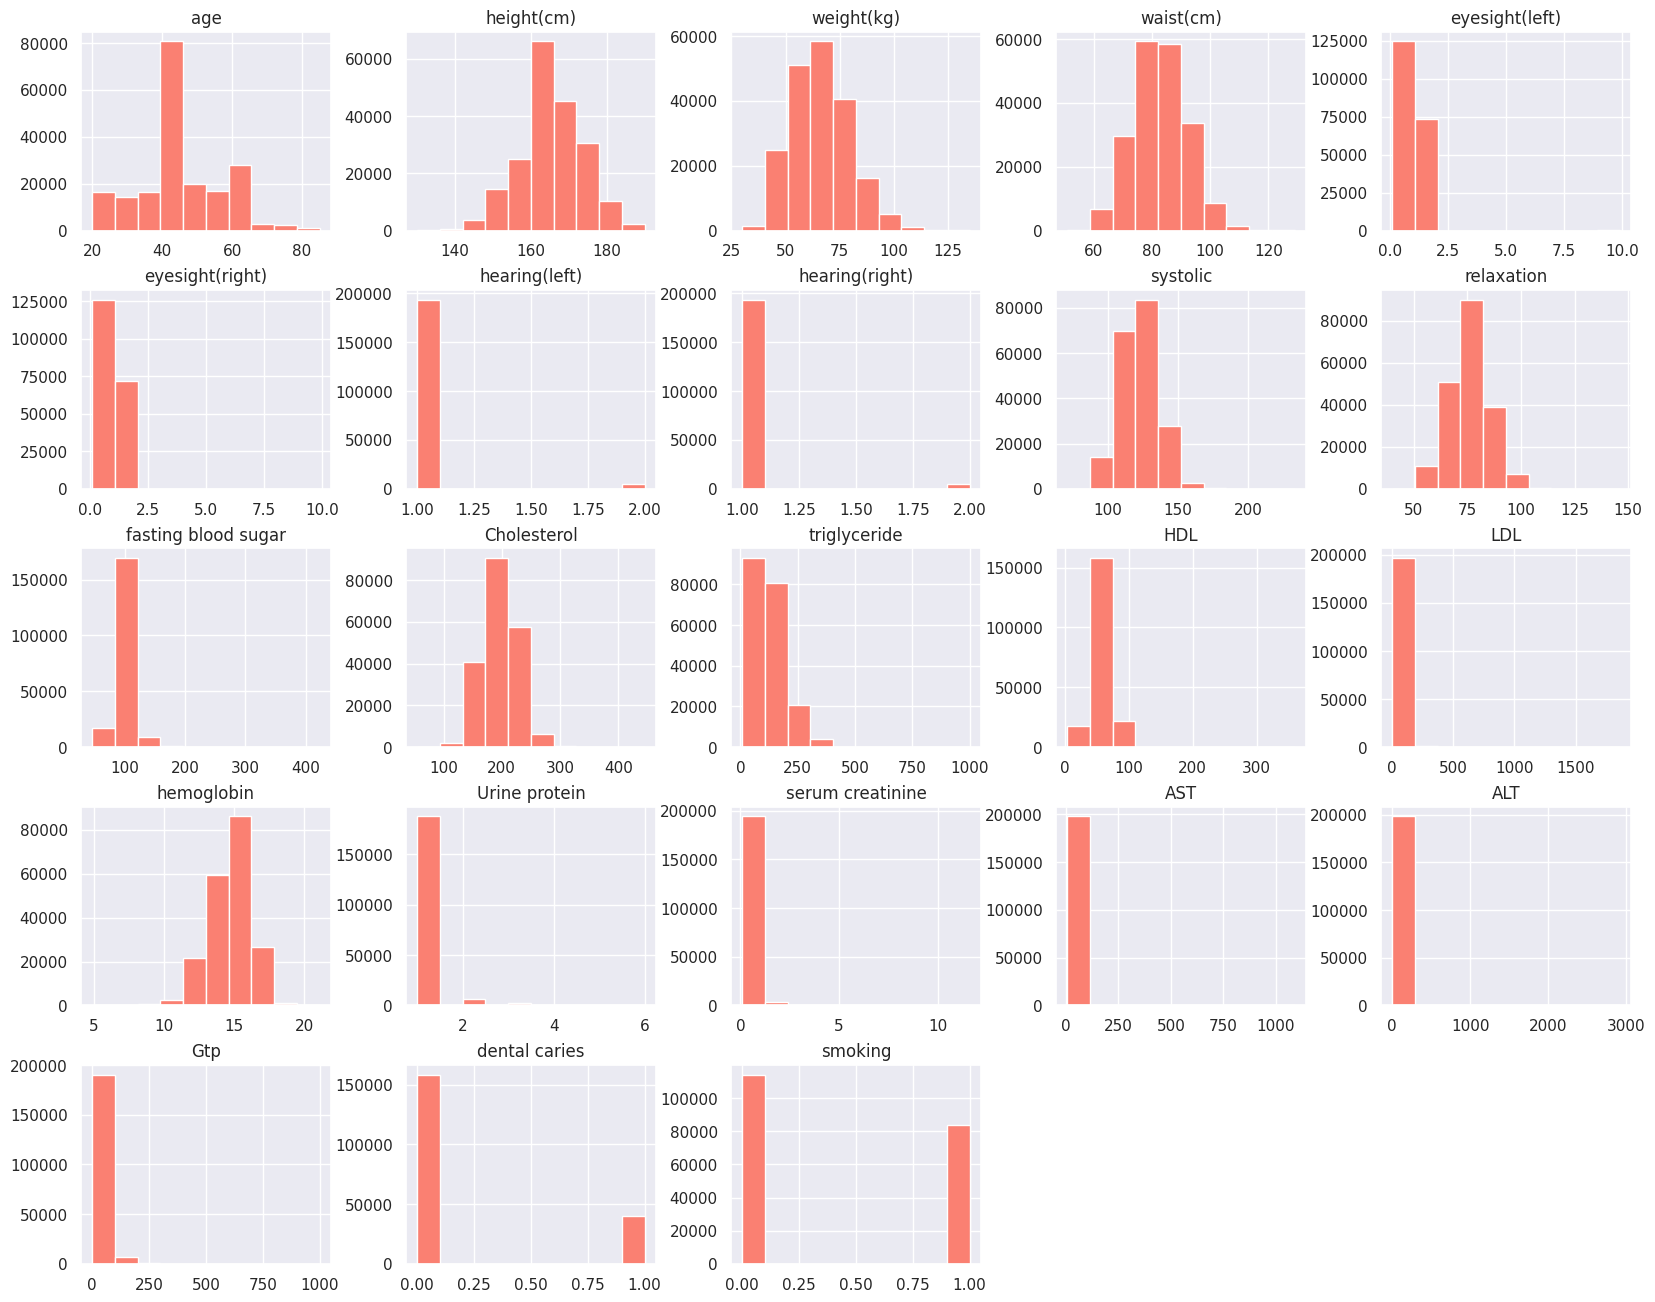

In [14]:
sns.set(rc={'figure.figsize': (20, 16)})
train.hist(color='Salmon');

#### The distribution of many variables in our data set is skewed. Then we could apply log transform to them

<a id='9'></a>
### <span style="color: gold">9 - Let's count target of train data</span>

In [15]:
print(f'{train.smoking.value_counts()}\n\n')
print(train.smoking.value_counts() / train.shape[0])

smoking
0    114269
1     83971
Name: count, dtype: int64


smoking
0    0.576417
1    0.423583
Name: count, dtype: float64


#### Smoking indicates whether the individual smokes or not.

<a id='10'></a>
### <span style="color: orange">10 - Transorm the data with logarithm</span>

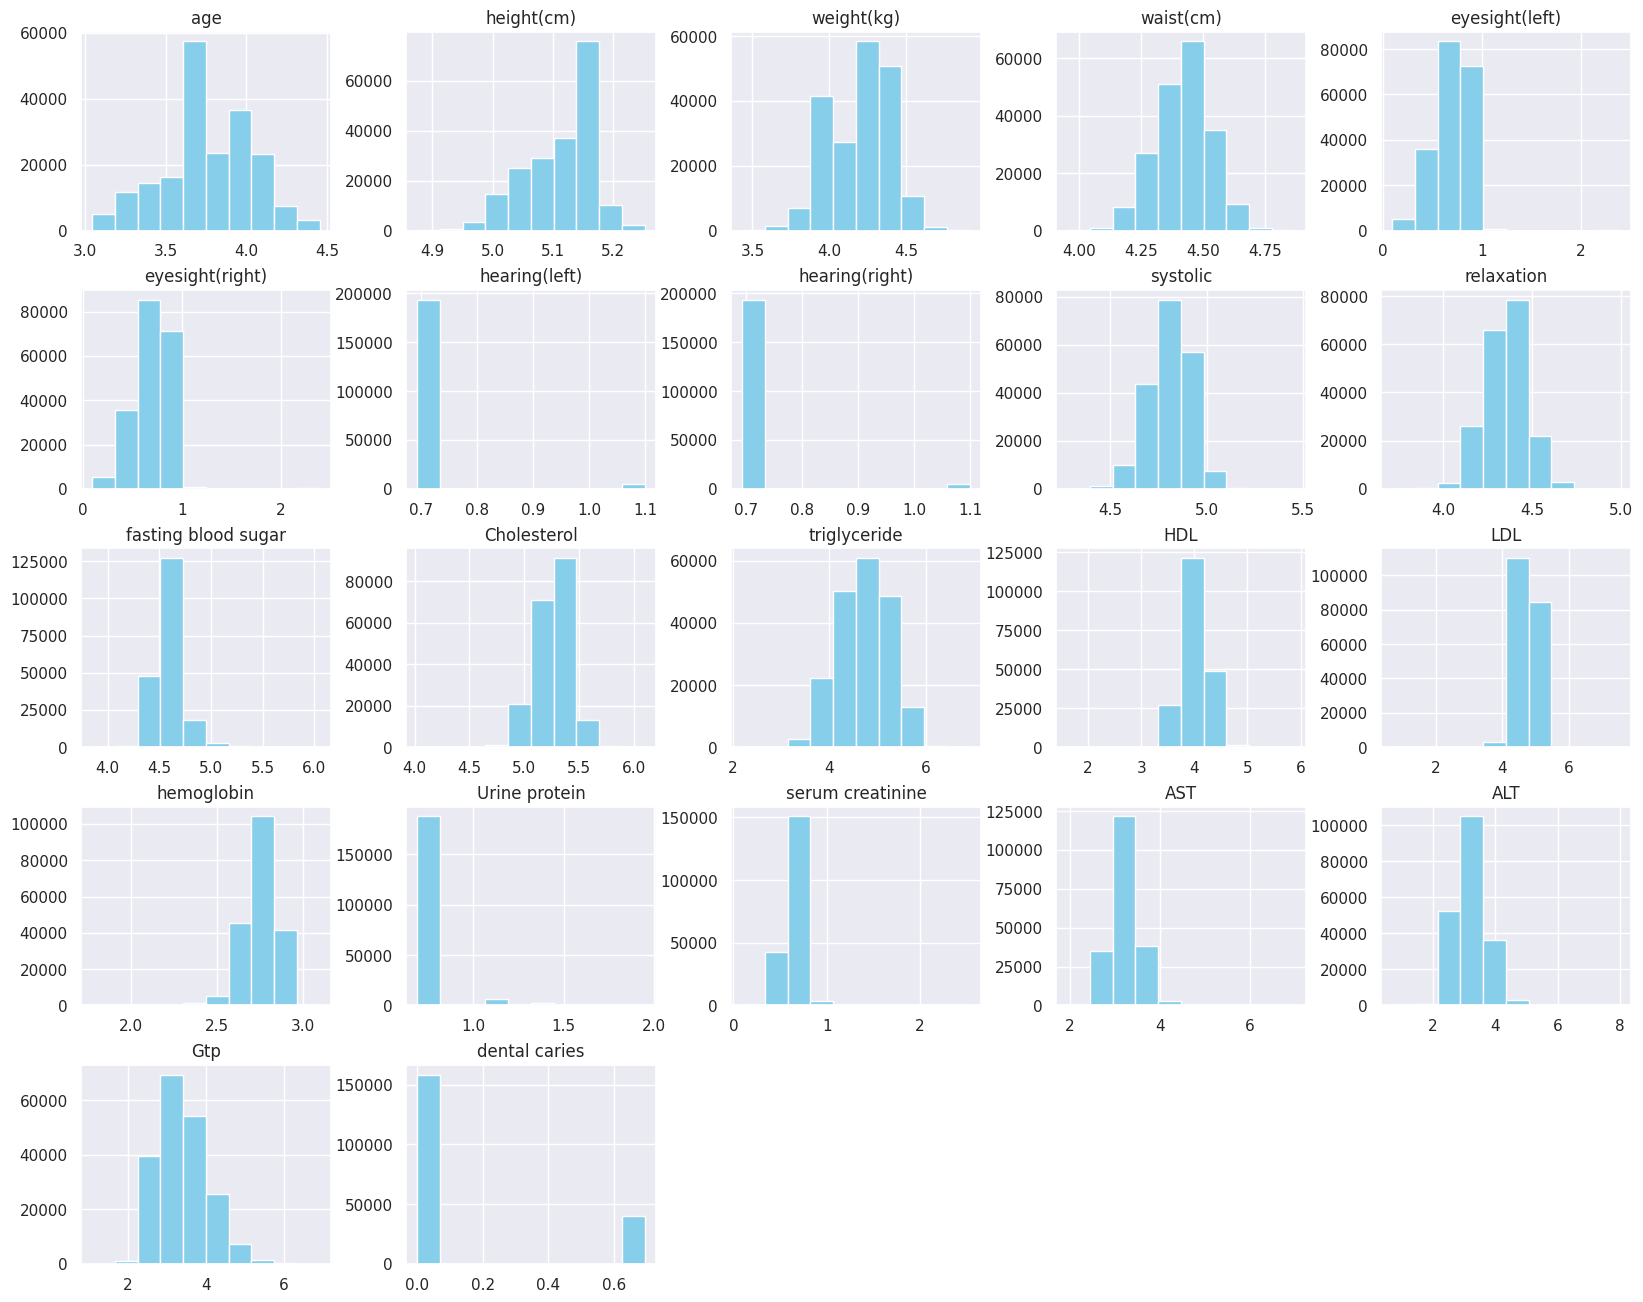

In [16]:
# Split the train data into X and y
X = train.drop(['smoking'], axis=1)
y = train.smoking

for column in X.columns.tolist():
    X[column] = X[column].apply(lambda x: np.log(x + 1))
    
# Transform test data
for column in test.columns.tolist():
    test[column] = test[column].apply(lambda x: np.log(x + 1))
    
X.hist(color='SkyBlue');

<a id='10.1'></a>
## 10.1 Feature importance

CPU times: user 4min 26s, sys: 395 ms, total: 4min 26s
Wall time: 4min 26s


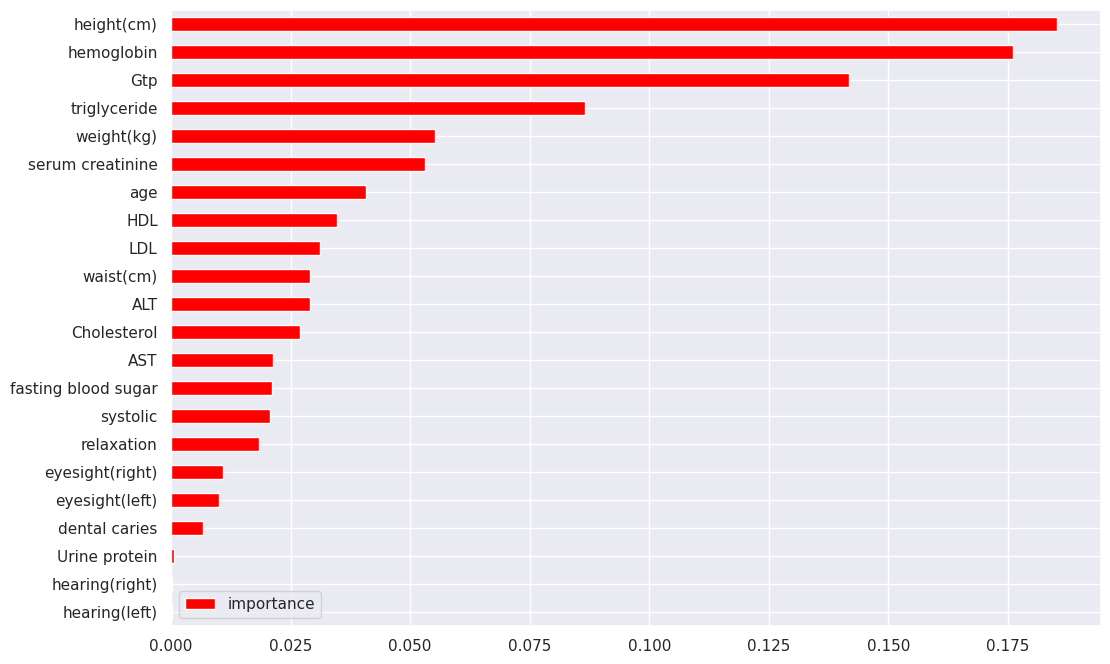

In [17]:
%%time
# I figured out best hyperparameters previously
best_forest = RandomForestClassifier(
    n_estimators=450,
    min_samples_split=2,
    min_samples_leaf=11,
    max_depth=19,
    random_state=26
)
    
best_forest.fit(X, y)
importance = best_forest.feature_importances_

feature_importance = pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
    .sort_values(ascending=True, by='importance')

feature_importance.plot(kind='barh', figsize=(12, 8), color='red');

So You can see 4 main features in the picture above

<a id='11'></a>
### <span style="color: gold">11 - Build a heat map of correlations</span>

In [18]:
correlation = X.corr()
correlation.style.background_gradient(cmap='Oranges')

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
age,1.000000,-0.485562,-0.328836,-0.047103,-0.306755,-0.305497,0.181685,0.182245,0.129176,0.064588,0.206314,0.123257,0.011282,0.035803,0.112416,-0.280473,0.001231,-0.166163,0.060130,-0.117388,-0.041214,-0.120030
height(cm),-0.485562,1.000000,0.694322,0.405498,0.252429,0.257893,-0.089237,-0.090221,0.075886,0.120083,0.022889,-0.100094,0.241925,-0.286124,-0.067946,0.555115,-0.009784,0.469622,0.066443,0.279361,0.311054,0.096192
weight(kg),-0.328836,0.694322,1.000000,0.829279,0.183185,0.189781,-0.065221,-0.066766,0.262040,0.276677,0.156377,0.023374,0.410929,-0.434959,0.069080,0.526626,-0.019307,0.411726,0.186435,0.468094,0.430465,0.086312
waist(cm),-0.047103,0.405498,0.829279,1.000000,0.051877,0.059095,0.009820,0.010430,0.320654,0.299616,0.235302,0.076444,0.437353,-0.440569,0.121648,0.414317,-0.018470,0.300735,0.227357,0.463940,0.438535,0.051230
eyesight(left),-0.306755,0.252429,0.183185,0.051877,1.000000,0.636113,-0.091915,-0.097385,-0.036543,0.012532,-0.060630,-0.009443,0.057115,-0.043851,-0.016066,0.153521,-0.013023,0.104256,-0.006745,0.085599,0.067782,0.023580
eyesight(right),-0.305497,0.257893,0.189781,0.059095,0.636113,1.000000,-0.092576,-0.099684,-0.029553,0.021810,-0.058593,-0.005999,0.064694,-0.049589,-0.013551,0.158954,-0.011288,0.104335,0.001354,0.096091,0.079199,0.029264
hearing(left),0.181685,-0.089237,-0.065221,0.009820,-0.091915,-0.092576,1.000000,0.545873,0.043378,-0.007826,0.030689,-0.028050,-0.019236,-0.004980,-0.013894,-0.044142,-0.003331,-0.008276,0.007835,-0.042078,-0.018297,-0.019165
hearing(right),0.182245,-0.090221,-0.066766,0.010430,-0.097385,-0.099684,0.545873,1.000000,0.041652,-0.012381,0.031551,-0.027307,-0.019416,-0.002980,-0.014647,-0.043125,-0.000004,-0.006931,0.011868,-0.041256,-0.016062,-0.016126
systolic,0.129176,0.075886,0.262040,0.320654,-0.036543,-0.029553,0.043378,0.041652,1.000000,0.755886,0.198061,0.069696,0.204927,-0.110904,0.049797,0.186240,-0.017779,0.076947,0.131282,0.175099,0.232298,0.021718
relaxation,0.064588,0.120083,0.276677,0.299616,0.012532,0.021810,-0.007826,-0.012381,0.755886,1.000000,0.172345,0.102439,0.228402,-0.120971,0.074992,0.235069,-0.008741,0.100096,0.126600,0.191203,0.259639,0.026168


<a id='12'></a>
### <span style="color: orange">12 - Define base models with tuned hyperparameters</span>

In [19]:
# I'm 26 years old, that's why I use random_state=26
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('catboost', CatBoostClassifier(
        iterations=175,  # 175
        learning_rate=0.1,
        depth=13,
        random_state=26
    )),
    ('xgboost', XGBClassifier(
        n_estimators=175,  # 175
        learning_rate=0.1,
        max_depth=3,
        random_state=26
    )),
    ('lightgbm', LGBMClassifier(
        n_estimators=175,  # 175
        learning_rate=0.1,
        max_depth=16,
        random_state=26
    )),
    ('random_forest', RandomForestClassifier(
        n_estimators=450,  # 450
        min_samples_split=2,
        min_samples_leaf=11,
        max_depth=19,
        random_state=26
    )),
]

<a id='13'></a>
### <span style="color: gold">13 - Defining the meta-model with tuned hyperparameters</span>

In [20]:
# meta_model = CatBoostClassifier(learning_rate=0.1, random_state=26)

# parameters = {
#     'iterations': range(25, 200, 25),
#     'depth': range(3, 16, 2),
#     'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001]
# }

# random_search = RandomizedSearchCV(estimator=meta_model, param_distributions=parameters, n_jobs=-1, cv=5)
# random_search.fit(X, y)
# random_search.best_params_


# best == {'learning_rate': 0.1, 'iterations': 75, 'depth': 13}
meta_model = CatBoostClassifier(
    iterations=75,
    learning_rate=0.1,
    depth=13,
    random_state=26
)

<a id='14'></a>
### <span style="color: orange">14 - Creating and fitting the stacking model

In [21]:
%%time
X_train, X_val, y_val, y_val = train_test_split(X, y, test_size=0.2, random_state=26)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X, y)

0:	learn: 0.6390399	total: 486ms	remaining: 1m 24s
1:	learn: 0.5983084	total: 851ms	remaining: 1m 13s
2:	learn: 0.5681363	total: 1.21s	remaining: 1m 9s
3:	learn: 0.5440006	total: 1.58s	remaining: 1m 7s
4:	learn: 0.5253634	total: 1.95s	remaining: 1m 6s
5:	learn: 0.5105820	total: 2.32s	remaining: 1m 5s
6:	learn: 0.4993986	total: 2.7s	remaining: 1m 4s
7:	learn: 0.4893576	total: 3.09s	remaining: 1m 4s
8:	learn: 0.4811754	total: 3.47s	remaining: 1m 4s
9:	learn: 0.4748440	total: 3.84s	remaining: 1m 3s
10:	learn: 0.4688278	total: 4.23s	remaining: 1m 3s
11:	learn: 0.4642253	total: 4.58s	remaining: 1m 2s
12:	learn: 0.4596586	total: 4.96s	remaining: 1m 1s
13:	learn: 0.4559625	total: 5.33s	remaining: 1m 1s
14:	learn: 0.4532628	total: 5.67s	remaining: 1m
15:	learn: 0.4503597	total: 6.04s	remaining: 60s
16:	learn: 0.4478249	total: 6.4s	remaining: 59.5s
17:	learn: 0.4453102	total: 6.76s	remaining: 59s
18:	learn: 0.4431805	total: 7.13s	remaining: 58.6s
19:	learn: 0.4413322	total: 7.48s	remaining: 58s

StackingClassifier(estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7a71d5df1150>),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, gr...
                                              monotone_constraints=None,
                                              n_estimators=175, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=26, ...)),
                               ('lightgbm',
                                LGBMClassifier(max_depth=16, n_estimators=175,
                                               random_state=26)),
                               ('random_forest',
                                RandomForestClassifier(max_depth=19,
                                                       min_samples_leaf=11,
                                                       n_estimators=450,
                                                       random_state=26))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7a71d5c49750>)

<a id='15'></a>
### <span style="color: gold">15 - Predict probabilitions on the validation set and calculate ROC AUC score</span>

In [22]:
y_pred_proba_val = stacking_model.predict_proba(X_val)

roc_auc_val = roc_auc_score(y_val, y_pred_proba_val[:, 1])
print(f"Validation ROC AUC Score: {roc_auc_val:.4f}")

Validation ROC AUC Score: 0.9204


<a id='16'></a>
### <span style="color: orange">16 - Predict probabilities on the test data</span>

In [23]:
y_pred_proba_test = stacking_model.predict_proba(test)
y_pred_proba_test[:10]

array([[0.36405013, 0.63594987],
       [0.8578085 , 0.1421915 ],
       [0.61628726, 0.38371274],
       [0.97759488, 0.02240512],
       [0.40522012, 0.59477988],
       [0.0744767 , 0.9255233 ],
       [0.55447134, 0.44552866],
       [0.94845274, 0.05154726],
       [0.8766383 , 0.1233617 ],
       [0.96219002, 0.03780998]])

<a id='17'></a>
### <span style="color: gold">17 - Build DataFrame and make first submission</span>

In [24]:
submission = pd.DataFrame({
    'id': sample_submission.id,
    'smoking': y_pred_proba_test[:, 1]
})

submission.to_csv('Kapturov_S3E24_submission.csv', index=False)
submission.head()

,id,smoking
0,159256,0.635950
1,159257,0.142192
2,159258,0.383713
3,159259,0.022405
4,159260,0.594780


# <span style="color: LimeGreen">🚭🍏 Please don't smoke and stay healthy!</span>

# 📢 I will improve my notebook soon! I will: make cross-validation, make better stacking model, add PCA.